# Problem Statement
### Customer Segmentation Analysis 
 - Customer segmentation is the problem of uncovering information about a firm's customer base, based on their interactions with the business.In most cases this interaction is in terms of their purchase behaviour and patterns.In this project I will explore some of the ways in which it can be used
- The owner of a mall want to understand the customers like who can be easily converge[Target Customers] so that the  sense can be given to marketing team and make strategy

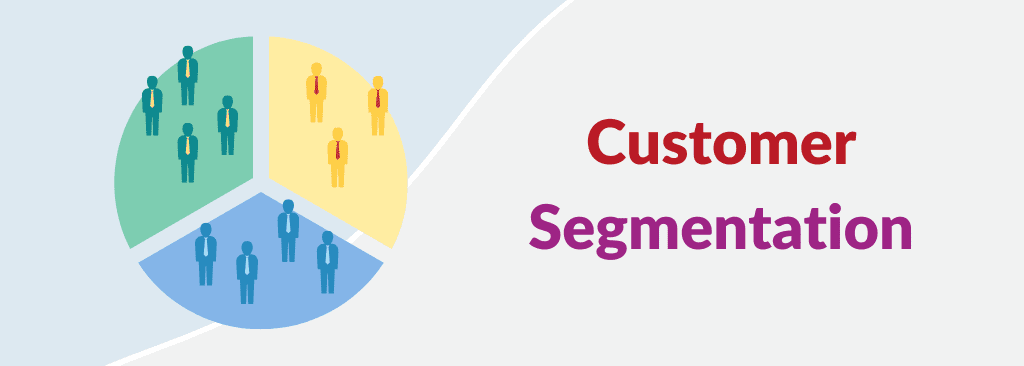

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file=pd.read_csv('Mall_Customers.csv')
file.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
file.shape

(200, 5)

In [4]:
file.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
file.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Data Visualization and EDA

In [7]:
file.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

C:\Users\ddole\AppData\Local\Temp\ipykernel_10776\2007876239.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(file['Age'])
C:\Users\ddole\AppData\Local\Temp\ipykernel_10776\2007876239.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(file['Annual Income (k$)'])
C:\Users\ddole\AppData\Local

Text(0, 0.5, 'Count of Spending')

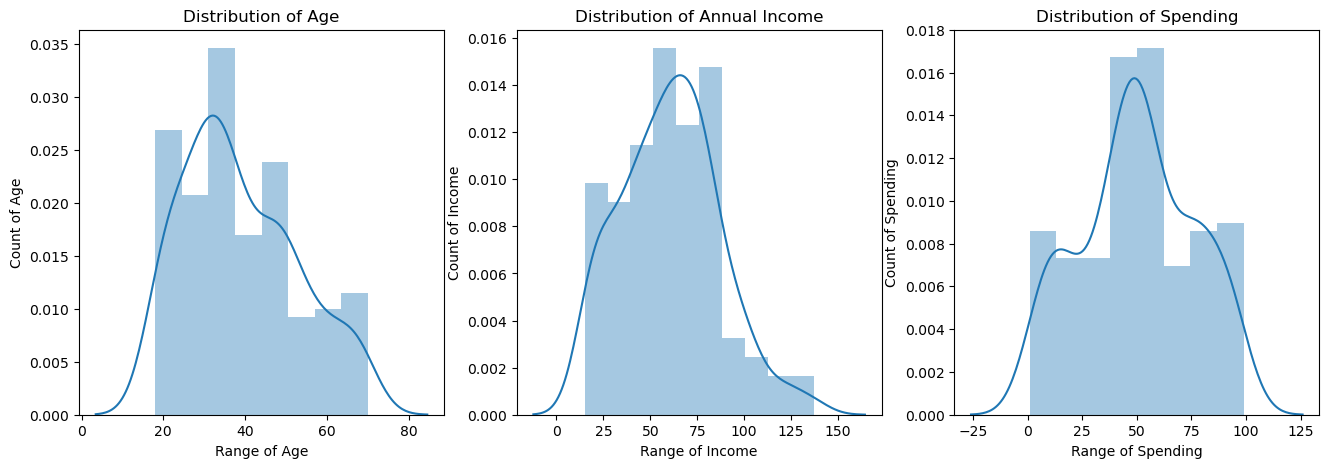

In [8]:
plt.figure(figsize=(16,5))

plt.subplot(1,3,1)  
sns.distplot(file['Age'])
plt.title('Distribution of Age')
plt.xlabel('Range of Age')
plt.ylabel('Count of Age')

plt.subplot(1,3,2) 
sns.distplot(file['Annual Income (k$)'])
plt.title('Distribution of Annual Income')
plt.xlabel('Range of Income')
plt.ylabel('Count of Income')

plt.subplot(1,3,3)
sns.distplot(file['Spending Score (1-100)'])
plt.title('Distribution of Spending')
plt.xlabel('Range of Spending')
plt.ylabel('Count of Spending')


In [9]:
x=file['Age'].value_counts()
x.head(10)

32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
Name: Age, dtype: int64

In [10]:
y=file['Annual Income (k$)'].value_counts()
y.head(10)

54    12
78    12
48     6
71     6
63     6
62     6
87     6
60     6
88     4
77     4
Name: Annual Income (k$), dtype: int64

In [11]:
z=file['Spending Score (1-100)'].value_counts()
z.head(10)

42    8
55    7
46    6
73    6
35    5
52    5
59    5
48    5
75    5
50    5
Name: Spending Score (1-100), dtype: int64

- Note: 
- Maximum number of customer lie in the age group of 32 and 35
- Maximum number of customer have income  of 54k & 90k dollar
- Maximum spending score of customer is between 30 to 60


### Male to Female ration in the mall

In [12]:
m_f_ratio=file.groupby('Gender').size()
m_f_ratio

Gender
Female    112
Male       88
dtype: int64

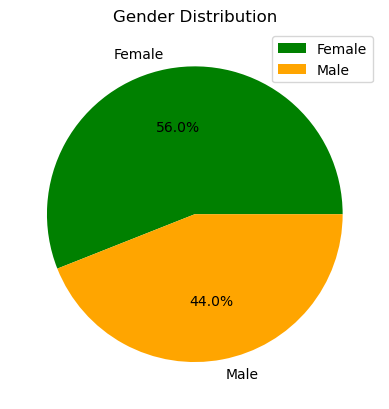

In [13]:
m_f_ratio.plot(kind='pie',
               subplots=True,
               colors=['Green','orange'],
               autopct='%2.1f%%',
               labels=['Female','Male'],
               legend=True)
plt.title('Gender Distribution')
plt.show()

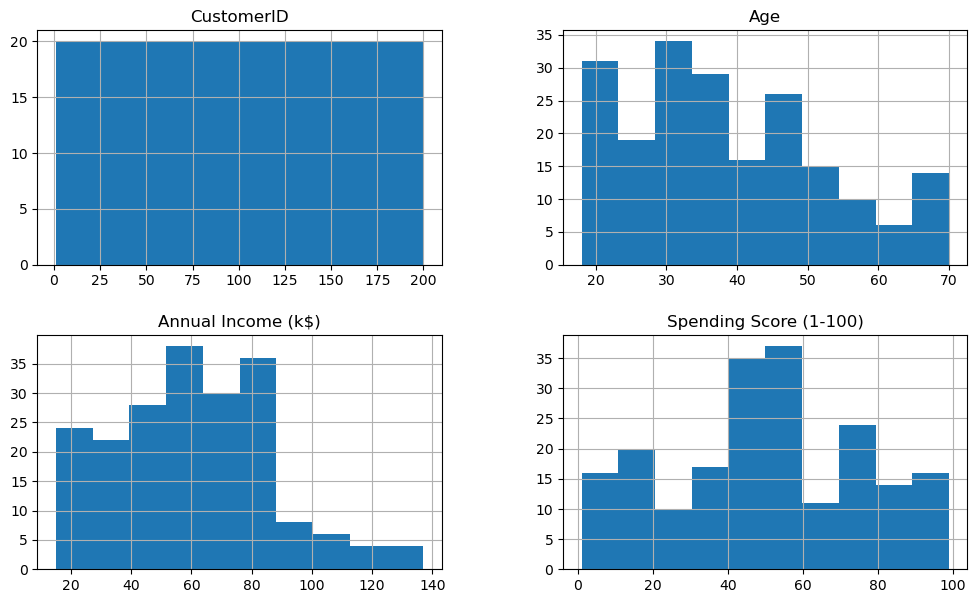

In [14]:
file.hist(figsize=(12,7))
plt.show()

#### Note:
- Mostly 28-32 age group people visit the mall with maximum annual income between 50k and 62k dollar with an spending score of around 40 to 60

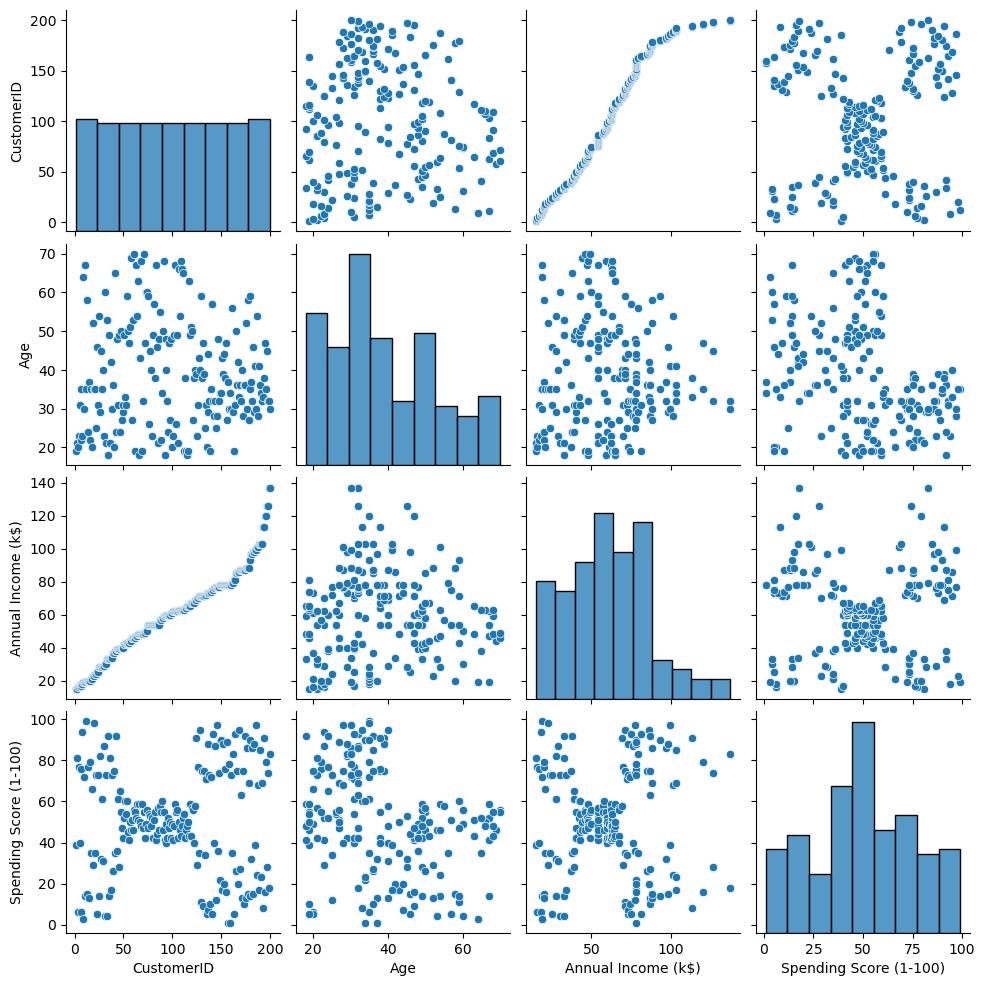

In [15]:
sns.pairplot(file)
plt.show()

#### Note:
- There are some customers who have less annual income but spending score is more
- Also there are customers whose annual income is between 60-90k dollar and their spending score is both above 60 and below 40
#### Conclusion:
- It may be that the person who is spending more and have less annual income is living in TIER-1 city
- From the above data we can't conclude on what basis we need to cluster the data.Hence we need more information

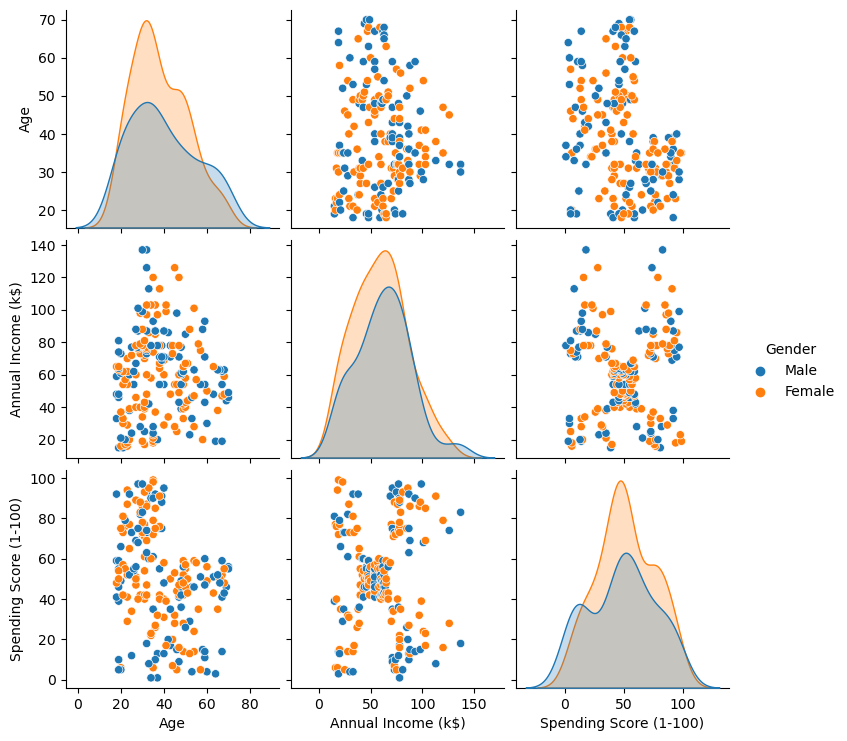

In [16]:
sns.pairplot(file,vars=['Age','Annual Income (k$)','Spending Score (1-100)'],hue='Gender')
plt.show()

#### Note:
- As age increases spending score increases
- Female spends slightly more than male

#### Which age group persons are mostly present

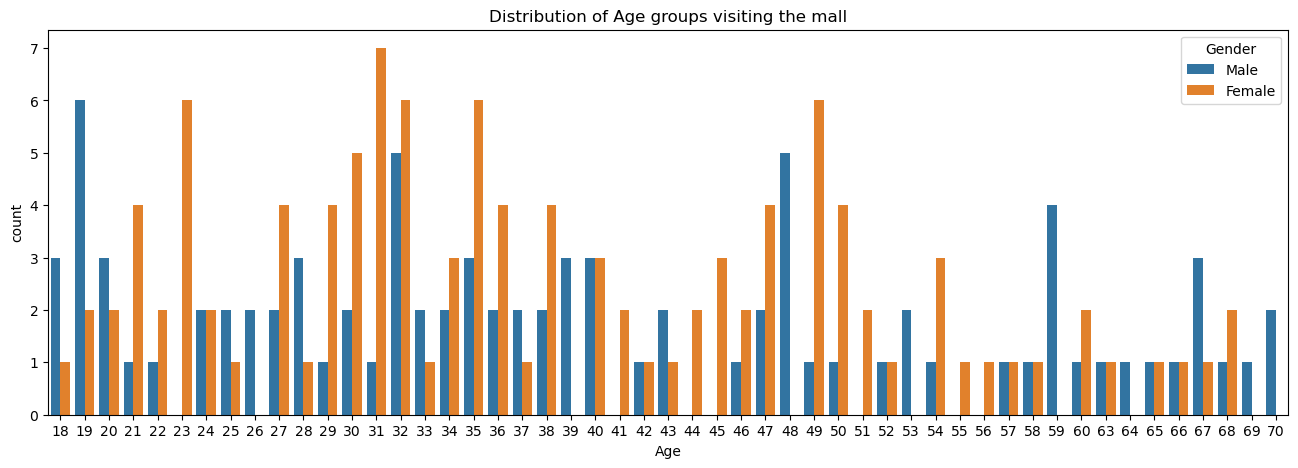

In [17]:
plt.figure(figsize=(16,5))
sns.countplot(x='Age',data=file,hue='Gender')
plt.title("Distribution of Age groups visiting the mall")
plt.show()

#### Note:
- From the graph we can see that mostly female with age 32 visits the mall and male with age 19 vists the mall

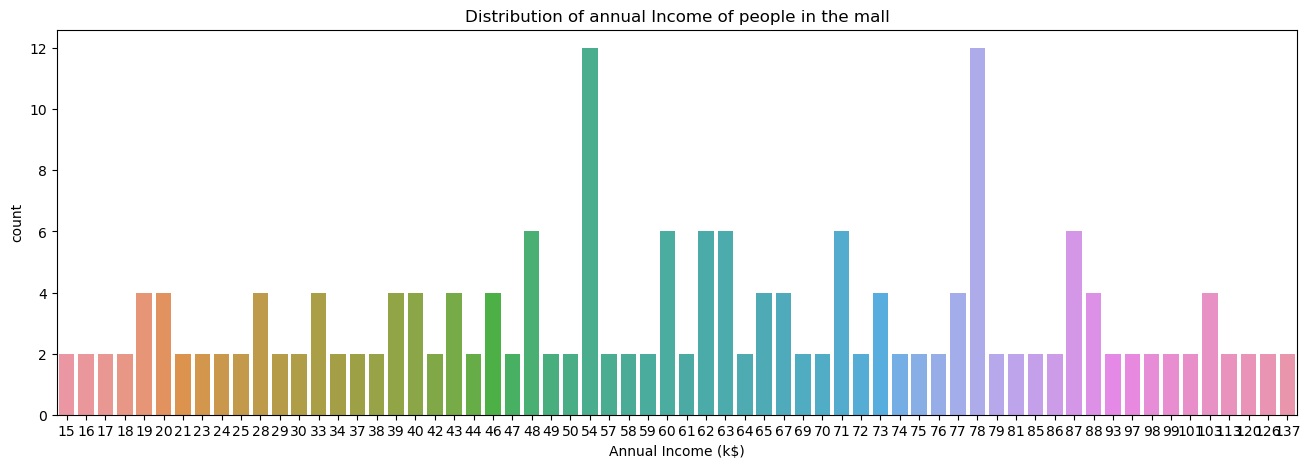

In [73]:
plt.figure(figsize=(16,5))
sns.countplot(x='Annual Income (k$)',data=file)
plt.title("Distribution of annual Income of people in the mall")
plt.show()

#### Note:
- People with an annual income of 54k and 78k dollar mostly vists the mall
- We also notice that people with annual income more than 100k dollar also visit the mall,it might be that the those people's family members visit the mall and shops

In [19]:
import dabl

Target looks like regression


[<Axes: title={'center': 'Target distribution'}, xlabel='Spending Score (1...', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=-3.45E-01'}, xlabel='Age', ylabel='Spending Score (1...'>,
         <Axes: title={'center': 'F=7.84E-03'}, xlabel='Annual Income (k$)'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=7.78E-02'}, xlabel='Spending Score (1-100)', ylabel='Gender'>]],
       dtype=object)]

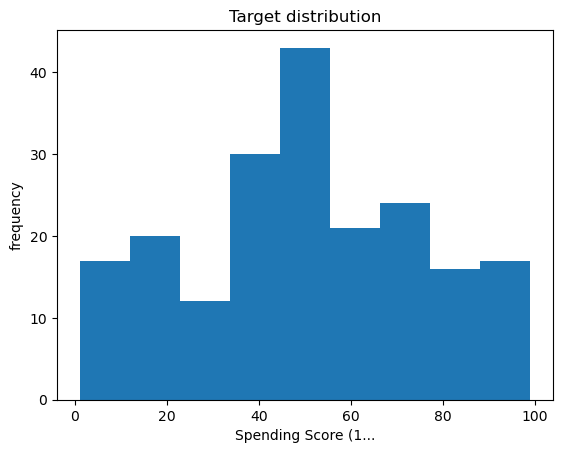

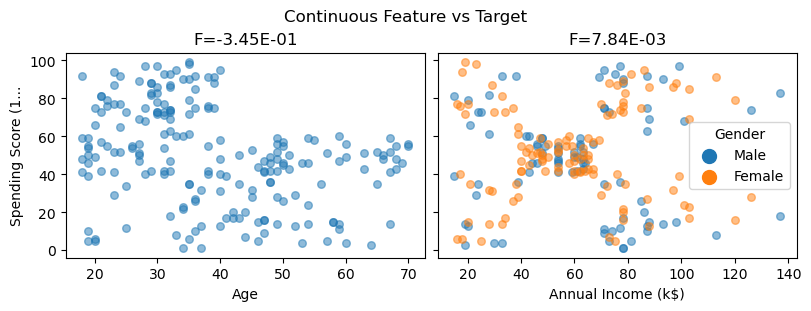

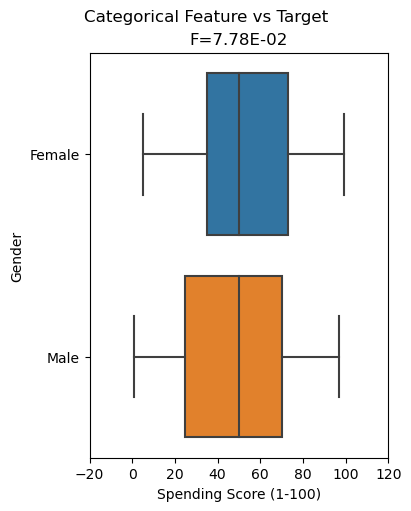

In [20]:
dabl.plot(file,target_col='Spending Score (1-100)')

#### Note:
- The data doesn't contain any outlier and as age increase spending score increase and decrease above age 40

Target looks like regression


[<Axes: title={'center': 'Target distribution'}, xlabel='Annual Income (k$)', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=1.98E-02'}, xlabel='Age', ylabel='Annual Income (k$)'>,
         <Axes: title={'center': 'F=7.84E-03'}, xlabel='Spending Score (1-100)'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=1.67E-03'}, xlabel='Annual Income (k$)', ylabel='Gender'>]],
       dtype=object)]

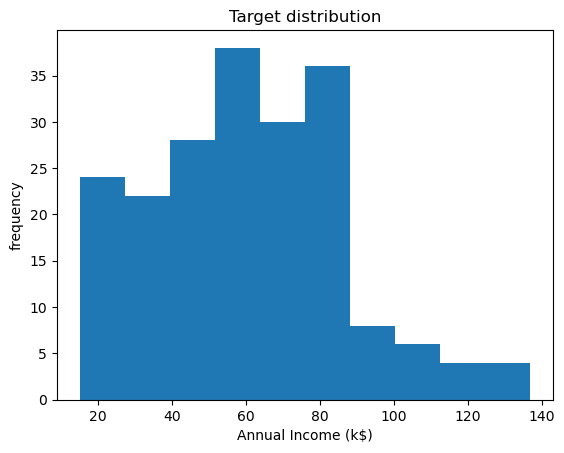

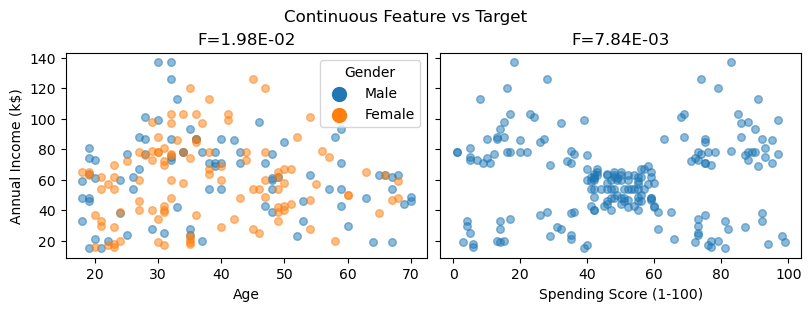

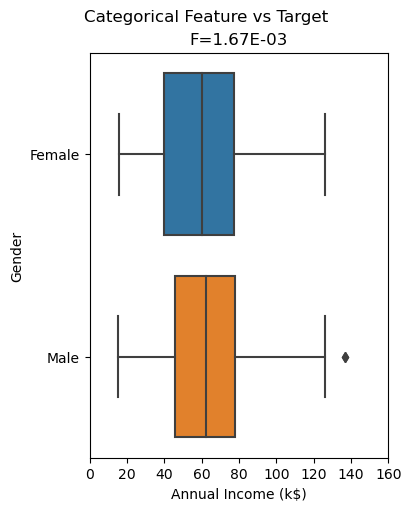

In [21]:
dabl.plot(file,target_col='Annual Income (k$)')

#### Note:
- Frequency of people with annual income more than 45 to 85 are more
- There are some outliers for male whose income is about 140k dollar

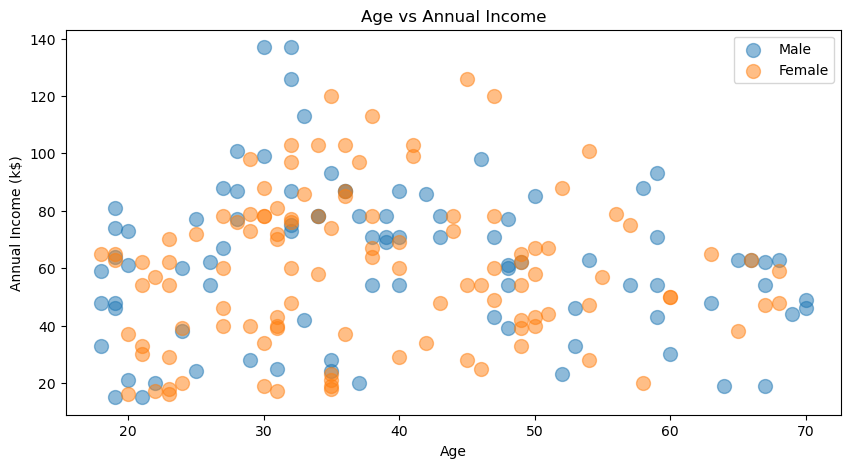

In [30]:
plt.figure(figsize=(10,5))
for gen in ['Male','Female']:
    plt.scatter(x='Age',y='Annual Income (k$)',data=file[file['Gender']==gen],s=100,alpha=0.5,label=gen)
plt.title("Age vs Annual Income")
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.legend()
plt.show()

#### Note:
- From the above graph we can see that male customers in the mall has highest income 

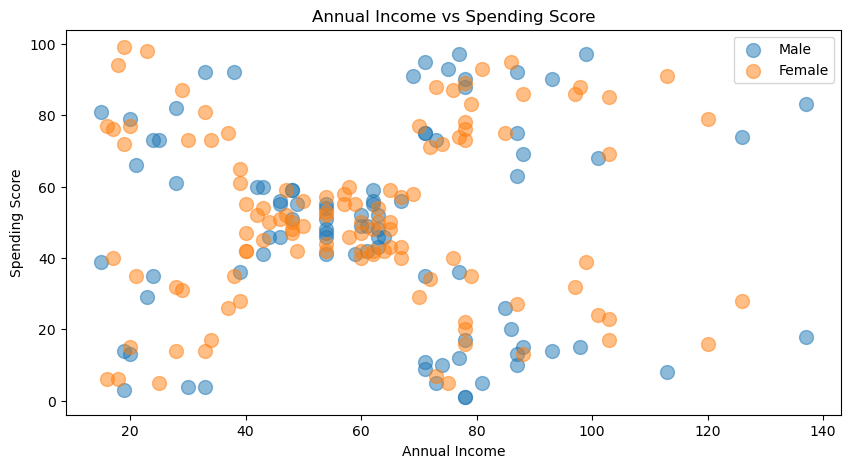

In [35]:
plt.figure(figsize=(10,5))
for gen in ['Male','Female']:
    plt.scatter(x='Annual Income (k$)',y='Spending Score (1-100)',data=file[file['Gender']==gen],s=100,alpha=0.5,label=gen)
plt.title("Annual Income vs Spending Score")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

#### Note:
- From the above graph:
- Female customers with an income range of 18-24 have the highest spending score.
- In the income range of 40-70, the spending score is nearly the same for both male and female customers.
- Male customers with an income above 70 have the highest spending score.

## Apply the KMeans  algorithm for clustering

In [37]:
file.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [46]:
x=file.iloc[:,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [47]:
from sklearn.cluster import KMeans

In [49]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
wcss

D:\Numpy\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Numpy\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Numpy\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Numpy\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. Y

[269981.28,
 185917.14253928524,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 38858.9599751439,
 31969.426550235483,
 29858.483597603947,
 22209.85160802555,
 20786.93669205916]

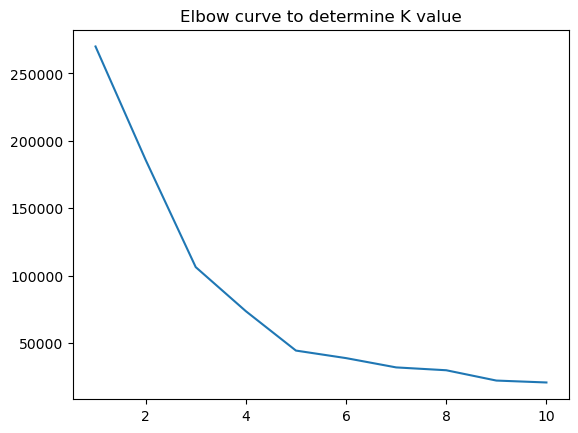

In [72]:
plt.plot(range(1,11),wcss)
plt.title("Elbow curve to determine K value")
plt.show()

#### Note:
- from the plot we get the best k value to be 5.
- Since after k=5 the cluster is calculating the same value

In [57]:
model=KMeans(n_clusters=5,init='k-means++',random_state=0)
y_means=model.fit_predict(x)
print(f"The cluster values are {y_means}")

The cluster values are [3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


D:\Numpy\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


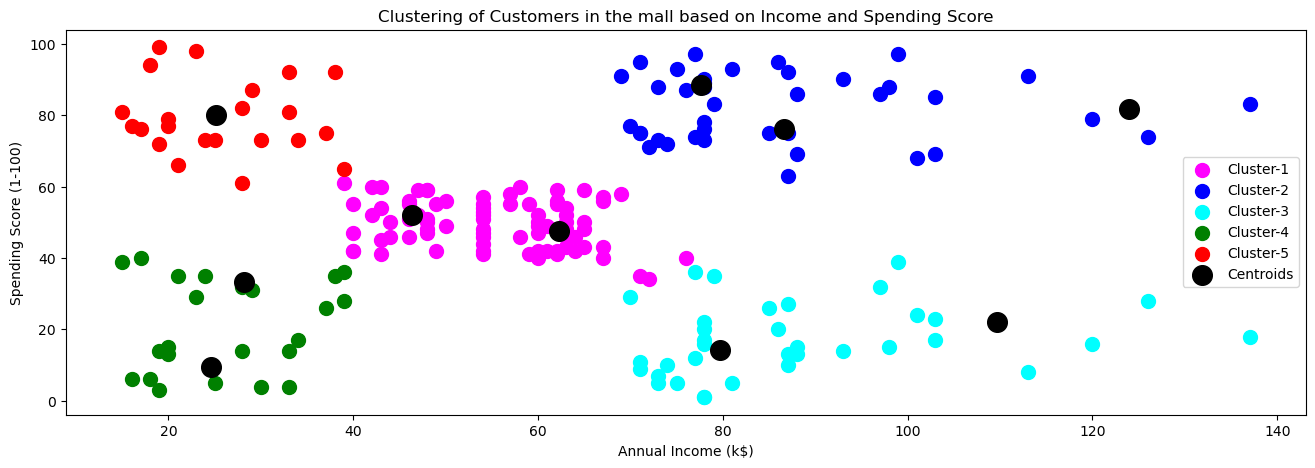

In [71]:
plt.figure(figsize=(16,5))
plt.scatter(x[y_means==0,0],x[y_means==0,1],s=100,c='magenta',label='Cluster-1')
plt.scatter(x[y_means==1,0],x[y_means==1,1],s=100,c='blue',label='Cluster-2')
plt.scatter(x[y_means==2,0],x[y_means==2,1],s=100,c='cyan',label='Cluster-3')
plt.scatter(x[y_means==3,0],x[y_means==3,1],s=100,c='green',label='Cluster-4')
plt.scatter(x[y_means==4,0],x[y_means==4,1],s=100,c='red',label='Cluster-5')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=200,c='black',label='Centroids')
plt.title("Clustering of Customers in the mall based on Income and Spending Score")
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

#### Conclusion:
- Cluster 1: Customers in this group have average earnings and spending.
- Cluster 2: This group consists of high earners who also spend more.
- Cluster 3: Customers in this cluster earn well but spend less.
- Cluster 4: This group has low income and low spending.
- Cluster 5: Customers in this cluster have low income but high spending.
##### Suggestion:
- Clusters 1 and 2 represent potential customers; understanding their product preferences and offering relevant items can help increase sales revenue.
- Customers in Cluster 5 spend more despite low income, while Cluster 4 spends less; introducing more affordable products could boost sales.